In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 세종시 dataset


In [3]:
# Data Laad
df = pd.read_csv('/content/drive/MyDrive/Project/sejong-compas-contest/아파트매매_부동산지수.csv', parse_dates=['yyyymmdd']).drop(columns=['Unnamed: 0'])

# Set 면적평균가
df['면적평균가'] = df['거래금액'].astype(float) / df['전용면적']


# Rename Column
df = df.rename(columns={'yyyymmdd':'년월일'})
df = df.set_index('년월일')

# Sort by Datetime
df = df.sort_index()
# Reducing Columns
df['법정동'] = df['법정동'].str.split(' ').str[0]
df['누적평균값'] = df['거래금액'].cumsum() / df['전용면적'].cumsum()

df = df.reindex(columns=['법정동','거래금액','전용면적','누적평균값', '아파트세종', '아파트전국','전체세종','전체서울','아파트서울','전체전국'])

In [26]:
df.columns

Index(['법정동', '거래금액', '전용면적', '누적평균값', '아파트세종', '아파트전국', '전체세종', '전체서울',
       '아파트서울', '전체전국'],
      dtype='object')

In [27]:
df.head(15)

,법정동,거래금액,전용면적,누적평균값,아파트세종,아파트전국,전체세종,전체서울,아파트서울,전체전국
년월일,,,,,,,,,,
2017-01-01,종촌동,27300,59.8652,456.024535,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-01,보람동,8600,16.9849,467.143179,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,13000,84.9228,302.275597,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,아름동,31300,84.9280,325.090018,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,어진동,7600,17.4250,332.417230,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,고운동,32000,84.9894,343.153107,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,19850,84.6682,321.934790,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,22500,128.9491,288.147514,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,19000,84.7067,279.794569,95.9,99.0,96.0,97.1,96.3,98.7


In [4]:
groupby_index = df.groupby(by=df.index).mean().index
groupby_mean = df.groupby(by=df.index).mean()
groupby_max = df.groupby(by=df.index).max()
groupby_min = df.groupby(by=df.index).min()
groupby_median = df.groupby(by=df.index).median()

In [5]:
df = groupby_mean[['거래금액']]
df['전용면적_mean'] = groupby_mean['전용면적']
df['거래금액_max'] = groupby_max['거래금액']
df['거래금액_min'] = groupby_min['거래금액']
df['전용면적_max'] = groupby_max['전용면적']
df['전용면적_min'] = groupby_min['전용면적']
df['면적당금액'] = groupby_mean['거래금액'] /groupby_mean['전용면적'] 
df['아파트지수'] = groupby_mean['아파트세종']

In [6]:
df

,거래금액,전용면적_mean,거래금액_max,거래금액_min,전용면적_max,전용면적_min,면적당금액,아파트지수
년월일,,,,,,,,
2017-01-01,17950.000000,38.425050,27300,8600,59.8652,16.9849,467.143179,95.9
2017-01-02,21015.000000,77.525720,32000,7600,128.9491,17.4250,271.071330,95.9
2017-01-03,28900.000000,59.938300,28900,28900,59.9383,59.9383,482.162490,95.9
2017-01-04,26800.000000,106.066217,39500,18300,130.2173,84.9228,252.672348,95.9
2017-01-05,19150.000000,54.614150,27300,11000,59.9383,49.2900,350.641729,95.9
...,...,...,...,...,...,...,...,...
2021-02-24,35531.818182,49.706200,79500,8500,104.9044,19.3200,714.836744,146.0
2021-02-25,25860.000000,58.428760,61000,10900,118.1980,26.4397,442.590259,146.0
2021-02-26,62771.428571,68.250014,107000,11000,98.0608,25.3500,919.727699,146.0


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
거래금액,1495.0,33705.024655,9808.111190,6500.000000,26956.468531,32771.428571,39377.479675,97625.000000
전용면적_mean,1495.0,76.426125,10.570351,16.942800,70.709217,77.919463,83.086137,111.261033
거래금액_max,1495.0,65085.339130,26247.059439,6500.000000,44807.500000,59900.000000,81350.000000,170000.000000
거래금액_min,1495.0,10349.033445,7688.184332,1800.000000,5800.000000,8500.000000,11500.000000,77500.000000
전용면적_max,1495.0,113.263771,20.193911,16.942800,99.986000,114.160000,125.708100,209.185200
전용면적_min,1495.0,40.041483,18.477448,12.179900,22.686000,39.690000,59.454400,106.760000
면적당금액,1495.0,443.968700,128.823467,141.731527,353.092820,416.717156,504.134860,990.750145
아파트지수,1495.0,106.633311,14.646001,95.700000,98.800000,100.400000,103.400000,146.000000


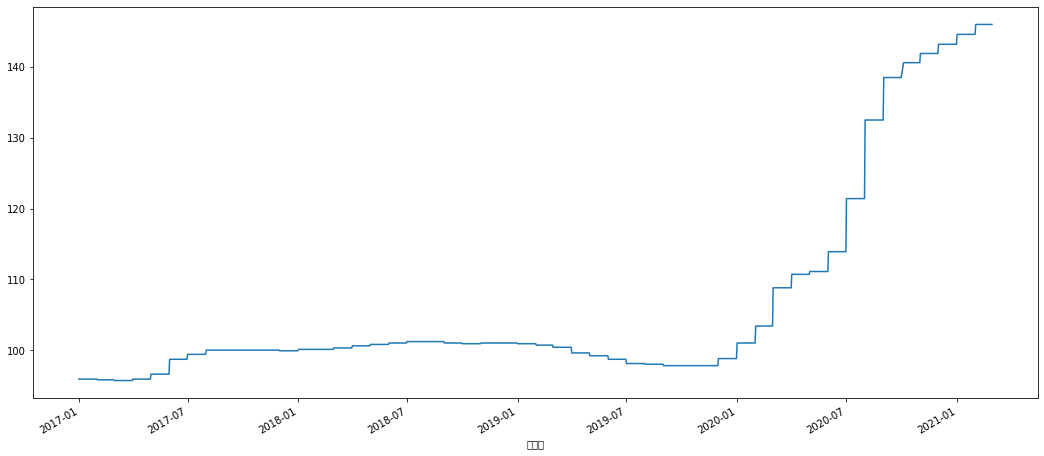

In [32]:
# y = 누적 평균값

df['아파트지수'].plot(figsize=(18,8));
# dong.head()

In [8]:
train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size], df.iloc[train_size:]

In [38]:
train_dataset

,거래금액,전용면적_mean,거래금액_max,거래금액_min,전용면적_max,전용면적_min,면적당금액,아파트지수
년월일,,,,,,,,
2017-01-01,17950.000000,38.425050,27300,8600,59.8652,16.9849,467.143179,95.9
2017-01-02,21015.000000,77.525720,32000,7600,128.9491,17.4250,271.071330,95.9
2017-01-03,28900.000000,59.938300,28900,28900,59.9383,59.9383,482.162490,95.9
2017-01-04,26800.000000,106.066217,39500,18300,130.2173,84.9228,252.672348,95.9
2017-01-05,19150.000000,54.614150,27300,11000,59.9383,49.2900,350.641729,95.9
...,...,...,...,...,...,...,...,...
2020-07-10,49538.297872,81.900936,120000,5900,152.7850,30.7152,604.856308,121.4
2020-07-11,53866.101695,84.800442,120000,3000,176.3430,20.1058,635.210150,121.4
2020-07-12,58267.857143,89.880436,85000,24000,130.2173,59.9159,648.281872,121.4


In [39]:
test_dataset

,거래금액,전용면적_mean,거래금액_max,거래금액_min,전용면적_max,전용면적_min,면적당금액,아파트지수
년월일,,,,,,,,
2020-07-15,48228.260870,79.346817,91700,9800,100.9214,19.9330,607.815946,121.4
2020-07-16,40495.789474,64.750358,116000,8800,103.2294,22.3310,625.414141,121.4
2020-07-17,57072.727273,91.480382,140000,22000,128.9491,59.9383,623.879417,121.4
2020-07-18,57244.444444,85.009589,127000,11000,152.7850,35.1600,673.388087,121.4
2020-07-19,43387.500000,62.890350,70500,33700,84.7300,59.2240,689.891215,121.4
...,...,...,...,...,...,...,...,...
2021-02-24,35531.818182,49.706200,79500,8500,104.9044,19.3200,714.836744,146.0
2021-02-25,25860.000000,58.428760,61000,10900,118.1980,26.4397,442.590259,146.0
2021-02-26,62771.428571,68.250014,107000,11000,98.0608,25.3500,919.727699,146.0


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


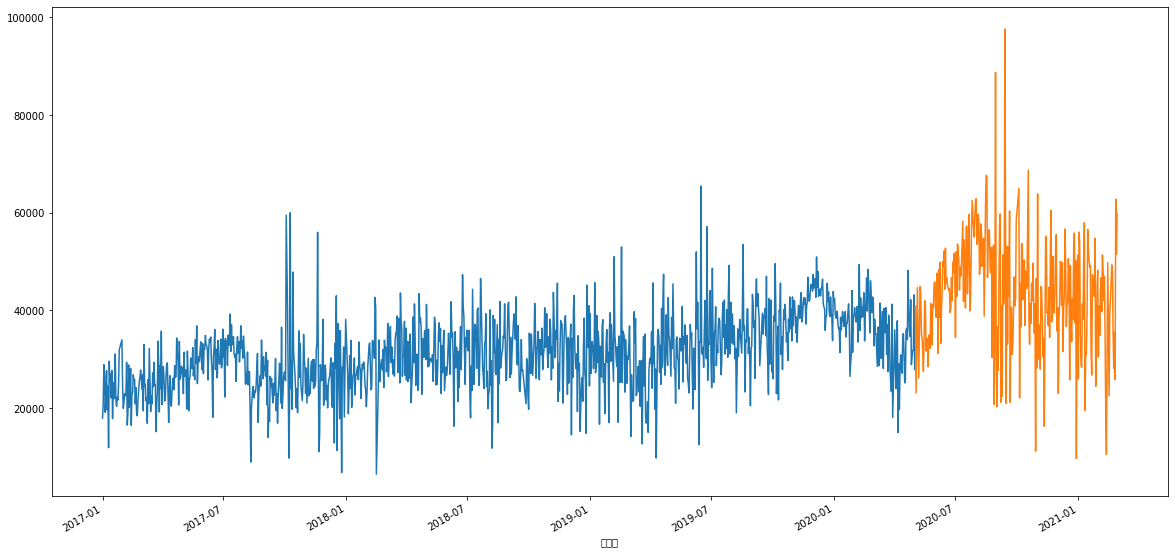

In [9]:
plt.figure(figsize=((20,10)))
train_dataset['거래금액'].plot()
test_dataset['거래금액'].plot()
plt.show()

In [10]:
print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

Dimension of train data:  (1196, 8)
Dimension of test data:  (299, 8)


In [42]:
## Split the target variable and dependent variables


In [22]:
# Split train data to X and y
X_train = train_dataset.drop('거래금액', axis = 1)
y_train = train_dataset.loc[:,['거래금액']]
# Split test data to X and y
X_test = test_dataset.drop('거래금액', axis = 1)
y_test = test_dataset.loc[:,['거래금액']]

## 2.5 Data transformation

In [23]:
print('Dimension of X train data: ',X_train.shape)
print('Dimension of y rain data: ',y_train.shape)
print('Dimension of X test data: ', X_test.shape)
print('Dimension of y test data: ', y_test.shape)

Dimension of X train data:  (1196, 7)
Dimension of y rain data:  (1196, 1)
Dimension of X test data:  (299, 7)
Dimension of y test data:  (299, 1)


the scale of the output is in the range 0–1 to match the scale of the activation function (tanh) on the output layer of LSTM, GRU, input variables are better to be small values, probably in the range of 0–1.

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)
# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)
# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

##2.6 Create a 3D input dataset
I define time_steps = 30. It means that the model makes predictions based on the last 30-day data 


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

# Create a 3D input
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 30
X_test, y_test = create_dataset(test_x_norm, test_y_norm,   
                                TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm, 
                                  TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_train.shape)

X_train.shape:  (269, 30, 7)
y_train.shape:  (1166, 1)
X_test.shape:  (269, 30, 7)
y_test.shape:  (1166, 1)


## LSTM and GRU models in TensorFlow

In [26]:
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

In [27]:
# GRU and LSTM
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

## 3.2 Fit the models



In [28]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 15)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2, batch_size = 128, 
                        shuffle = False, callbacks = [early_stop])
    return history
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

Epoch 1/100
8/8 [==============================] - 4s 135ms/step - loss: 0.0363 - val_loss: 0.0123
Epoch 2/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0230 - val_loss: 0.0193
Epoch 3/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0147 - val_loss: 0.0095
Epoch 4/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0168 - val_loss: 0.0181
Epoch 5/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0143 - val_loss: 0.0101
Epoch 6/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0160 - val_loss: 0.0142
Epoch 7/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0138 - val_loss: 0.0112
Epoch 8/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0150 - val_loss: 0.0122
Epoch 9/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0143 - val_loss: 0.0105
Epoch 10/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0139 - val_loss: 0.0105
Epoch 11/100
8/8 [

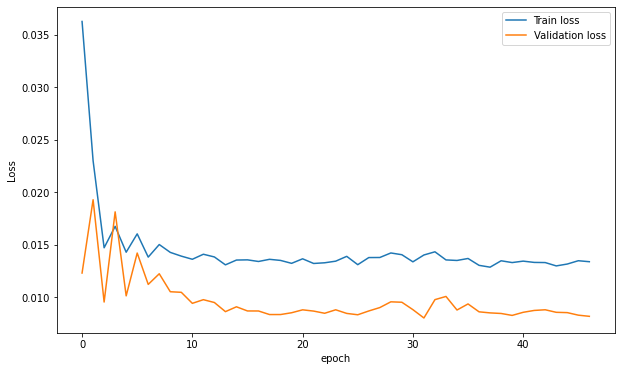

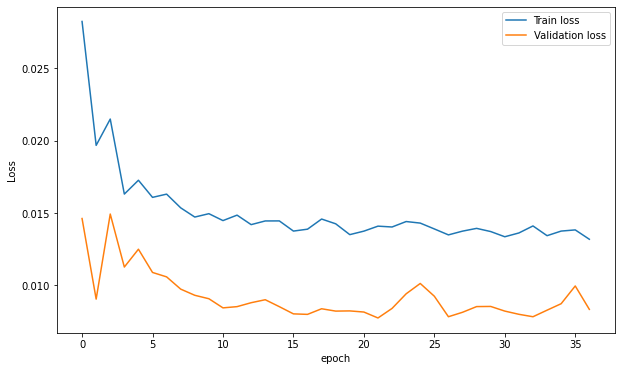

In [29]:
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
plot_loss (history_lstm)
plot_loss (history_gru)

## 3.3 Inverse transform the target variable

After building the model, I have to transform the target variable back to original data space for train and test data using `scaler_y.inverse_transform.`

In [30]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

##  Make prediction using  LSTM and GRU
 I plot true future (test data) vs prediction the  models.


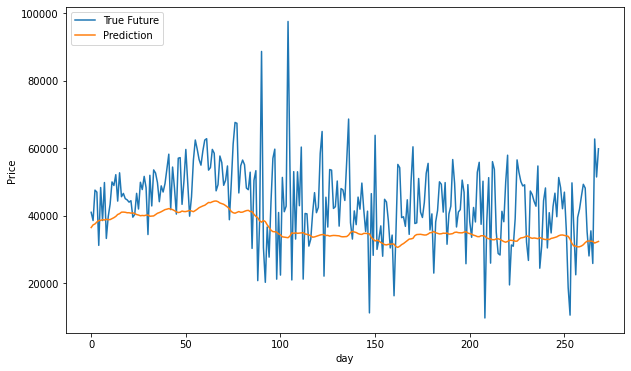

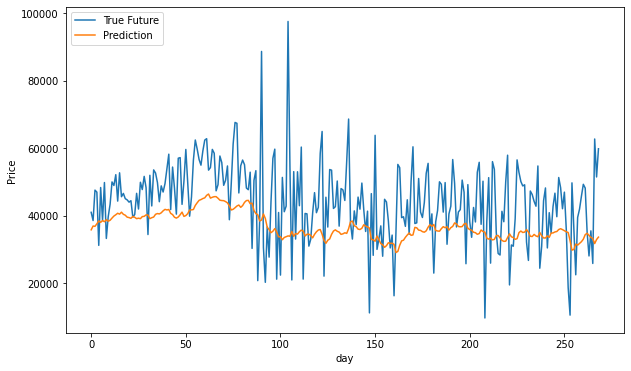

In [31]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

# Plot true future vs prediction
def plot_future(prediction, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='True Future')     
    plt.plot(np.arange(range_future),np.array(prediction),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('day')
    plt.ylabel('Price')

plot_future(prediction_lstm, y_test)
plot_future(prediction_gru, y_test)


## Regression

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor()

prediction(sgd_regressor)

NameError: ignored

In [1]:
df.describe().transpose().applymap(np.ceil)

NameError: ignored

In [199]:
df.dtypes

거래금액         float64
전용면적_mean    float64
거래금액_max       int64
거래금액_min       int64
전용면적_max     float64
전용면적_min     float64
면적당금액        float64
아파트지수        float64
dtype: object

In [200]:
df.head()

,거래금액,전용면적_mean,거래금액_max,거래금액_min,전용면적_max,전용면적_min,면적당금액,아파트지수
년월일,,,,,,,,
2017-01-01,17950.0,38.425050,27300,8600,59.8652,16.9849,467.143179,95.9
2017-01-02,21015.0,77.525720,32000,7600,128.9491,17.4250,271.071330,95.9
2017-01-03,28900.0,59.938300,28900,28900,59.9383,59.9383,482.162490,95.9
2017-01-04,26800.0,106.066217,39500,18300,130.2173,84.9228,252.672348,95.9
2017-01-05,19150.0,54.614150,27300,11000,59.9383,49.2900,350.641729,95.9


In [201]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['거래금액','전용면적','누적평균값', '아파트세종', '아파트전국','전체세종','전체서울','아파트서울','전체전국']
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])
scaled

KeyError: ignored

In [39]:
bdf = pd.DataFrame(scaled, columns=scale_cols)


In [40]:
df

,거래금액,전용면적,누적평균값,아파트세종,아파트전국,전체세종,전체서울,아파트서울,전체전국
0,-0.449383,-0.737389,1.234560,-0.839677,-0.687283,-0.961228,-2.139865,-2.201476,-1.3676
1,-1.316181,-2.568038,1.477060,-0.839677,-0.687283,-0.961228,-2.139865,-2.201476,-1.3676
2,-1.112228,0.332372,-2.118739,-0.839677,-0.687283,-0.961228,-2.139865,-2.201476,-1.3676
3,-0.263972,0.332594,-1.621151,-0.839677,-0.687283,-0.961228,-2.139865,-2.201476,-1.3676
4,-1.362533,-2.549249,-1.461343,-0.839677,-0.687283,-0.961228,-2.139865,-2.201476,-1.3676
...,...,...,...,...,...,...,...,...,...
24412,1.483528,-0.241358,1.747256,2.422826,3.391248,2.399377,1.392818,1.362751,2.9804
24413,-1.151628,-2.150923,1.747248,2.422826,3.391248,2.399377,1.392818,1.362751,2.9804
24414,2.480113,0.335621,1.747824,2.422826,3.391248,2.399377,1.392818,1.362751,2.9804
24415,4.079284,1.383049,1.748663,2.422826,3.391248,2.399377,1.392818,1.362751,2.9804


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('누적평균값', 1), df['누적평균값'], test_size=0.2, random_state=0, shuffle=False)


In [42]:
import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [43]:
WINDOW_SIZE=30
BATCH_SIZE=32

In [58]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [45]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 30, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(32, activation='tanh'),
    Dense(32, activation="relu"),
    Dense(1),
])

In [47]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [48]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=5)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [49]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=30, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/30
610/610 [==============================] - 12s 16ms/step - loss: 0.0433 - mse: 0.0966 - val_loss: 0.0150 - val_mse: 0.0300

Epoch 00001: val_loss improved from inf to 0.01499, saving model to tmp/ckeckpointer.ckpt
Epoch 2/30
610/610 [==============================] - 9s 15ms/step - loss: 0.0013 - mse: 0.0025 - val_loss: 0.0130 - val_mse: 0.0259

Epoch 00002: val_loss improved from 0.01499 to 0.01296, saving model to tmp/ckeckpointer.ckpt
Epoch 3/30
610/610 [==============================] - 9s 15ms/step - loss: 8.7601e-05 - mse: 1.7520e-04 - val_loss: 0.0104 - val_mse: 0.0209

Epoch 00003: val_loss improved from 0.01296 to 0.01043, saving model to tmp/ckeckpointer.ckpt
Epoch 4/30
610/610 [==============================] - 9s 15ms/step - loss: 4.7167e-05 - mse: 9.4335e-05 - val_loss: 0.0107 - val_mse: 0.0215

Epoch 00004: val_loss did not improve from 0.01043
Epoch 5/30
610/610 [==============================] - 9s 15ms/step - loss: 3.9915e-05 - mse: 7.9831e-05 - val_loss: 0.

In [63]:
model.load_weights(filename)
pred = model.predict(y_test)


ValueError: ignored

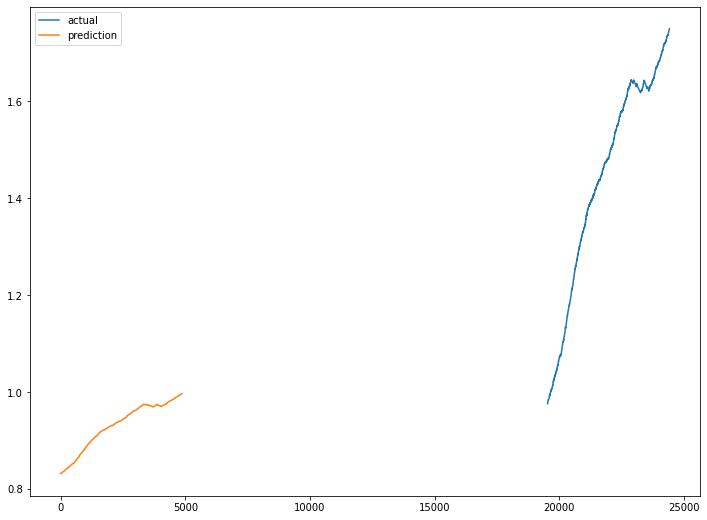

In [65]:
plt.figure(figsize=(12, 9))
plt.plot((y_test), label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [62]:
y_test

19533    0.975541
19534    0.975785
19535    0.976068
19536    0.976426
19537    0.977096
           ...   
24412    1.747256
24413    1.747248
24414    1.747824
24415    1.748663
24416    1.748667
Name: 누적평균값, Length: 4884, dtype: float64